In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
%matplotlib inline

In [4]:
today = datetime.today().date()

In [9]:
def get_hist_price(ticker, startDate, endDate):
    
    '''
    get historical price for a particular ticker from startDate to endDate
    and save it to a .csv file
    '''
    
    resultData = yf.download(ticker, startDate, endDate)
    df = pd.DataFrame(resultData)
    
    return df
    
    #resultData.to_csv(ticker + ".csv")

In [10]:
ticker = 'GOOGL'
startDate = '2000-01-02'
endDate = datetime.today().date()

google = get_hist_price(ticker, startDate, endDate)

[*********************100%%**********************]  1 of 1 completed


In [90]:
spy = get_hist_price('SPY', '1990-01-02', datetime.today().date())

[*********************100%%**********************]  1 of 1 completed


In [91]:
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.029366,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.207392,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.260796,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.527828,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.634645,531500
...,...,...,...,...,...,...
2023-08-24,444.690002,445.220001,436.859985,436.890015,436.890015,88517300
2023-08-25,438.679993,441.299988,435.000000,439.970001,439.970001,102297000
2023-08-28,442.239990,443.399994,439.970001,442.760010,442.760010,61595400


In [13]:
len(google)

4791

Reference for below code: https://neptune.ai/blog/predicting-stock-prices-using-machine-learning 

In [28]:
def plot_price(df, typePrice):
    '''
    plot the dataframe df 
    '''
    sns.set(style="whitegrid")  # Set the style of the plot

    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.lineplot(data=df[typePrice])
    
    def get_dataframe_name(dataframe):
        for name, obj in globals().items():
            if obj is dataframe:
                return name
        return None
   
    stock_name = get_dataframe_name(df)
    # Set labels and title
    plt.xlabel('Time Stamp')
    plt.ylabel(typePrice + ' Price')
    plt.title(stock_name + ' ' + typePrice + ' Price Movement')

    # Show the plot
    plt.show()

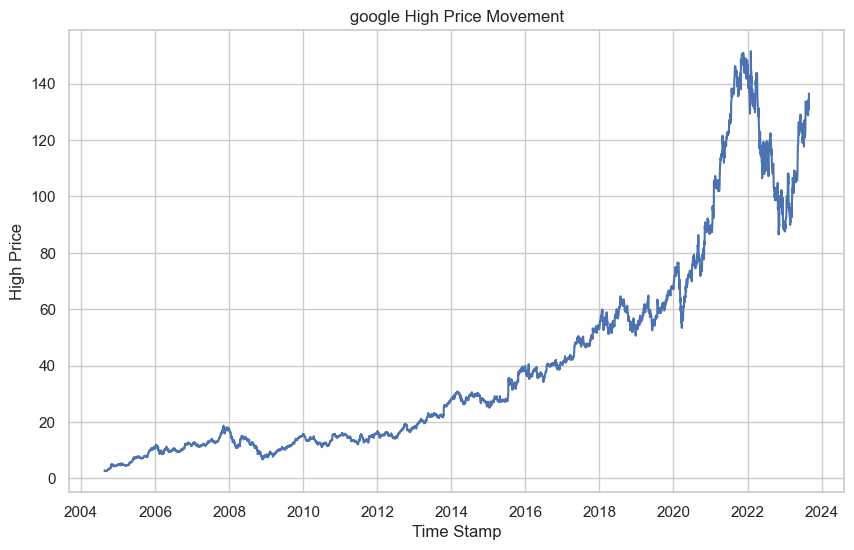

In [29]:
plot_price(google, 'High')

In [57]:
def moving_avg(df,priceType, window_size=50):
    
    '''add a column named ['window_size'] for simple moving average of x days'''
    
    window_var = f"{window_size}day{priceType}average"

    df[window_var] = df[priceType].rolling(window_size).mean()
    
    #return df
    
    

In [47]:
def ema(df, priceType, window_size=50):
    ###### Exponential MA
    window_ema_var = f"{window_size}{priceType}_EMA"

    # Calculate the 50-day exponentially weighted moving average
    df[window_ema_var] = (
        df[priceType].ewm(span=window_size, adjust=False).mean()
    )
    
    

In [51]:
def plot_average(df, average):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
        # Create a line plot using Seaborn
    sns.lineplot(x='Date', y=average, data=df)

        # Customize the plot (optional)
    plt.title(f'Line Plot of {average}' )
    plt.xlabel('Date')
    plt.ylabel(average)

        # Show the plot
    plt.show()

In [60]:
moving_avg(google, 'High')

In [61]:
google

,Open,High,Low,Close,Adj Close,Volume,50High_EMA,50dayHighaverage
Date,,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924,2.604104,NaN
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856,2.609031,NaN
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512,2.618082,NaN
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748,2.624933,NaN
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044,2.627983,NaN
...,...,...,...,...,...,...,...,...
2023-08-24,133.949997,134.250000,129.570007,129.779999,129.779999,28500700,126.958478,126.500400
2023-08-25,129.539993,130.759995,127.250000,129.880005,129.880005,26744800,127.107557,126.634600
2023-08-28,131.309998,132.539993,130.139999,131.009995,131.009995,20543300,127.320594,126.776199


In [62]:
## Split the time-series data into training seq X and output value Y
def extract_seqX_outcomeY(data, N, offset):
    """
    Split time-series into training sequence X and outcome value Y
    Args:
        data - dataset
        N - window size, e.g., 50 for 50 days of historical stock prices
        offset - position to start the split
    """
    X, y = [], []

    for i in range(offset, len(data)):
        X.append(data[i - N : i])
        y.append(data[i])

    return np.array(X), np.array(y)

In [80]:
def train_split(df, priceType, window_size=50, test_ratio=0.2):
    
    
    #test_ratio=0.2
    training_ratio = 1 - test_ratio

    train_size = int(training_ratio * len(df))
    test_size = int(test_ratio * len(df))
    print(f"train_size: {train_size}")
    print(f"test_size: {test_size}")

    train = df[:train_size][[priceType]]
    test = df[train_size:][[priceType]]
    return train, test



In [81]:
train, test = train_split(google, 'High')

# Scale our dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(google[['High']])
scaled_data_train = scaled_data[: train.shape[0]]

window_size = 50
# We use past 50 days’ stock prices for our training to predict the 51th day's closing price.
X_train, y_train = extract_seqX_outcomeY(scaled_data_train, window_size, window_size)

train_size: 3832
test_size: 958


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming X_train and y_train are your training data
# X_train shape: (num_samples, timesteps, num_features)
# y_train shape: (num_samples, num_classes)

# Define the LSTM model

timesteps = X_train.shape[1]
num_features = X_train.shape[2]


model = Sequential()
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(timesteps, num_features), activation='tanh'))
model.add(Dense(units=1, activation='linear'))  # Using 'linear' activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
119/119 [==============================] - 7s 40ms/step - loss: 0.0138
Epoch 2/10
119/119 [==============================] - 5s 39ms/step - loss: 5.0772e-04
Epoch 3/10
119/119 [==============================] - 4s 37ms/step - loss: 4.9649e-04
Epoch 4/10
119/119 [==============================] - 5s 38ms/step - loss: 4.8127e-04
Epoch 5/10
119/119 [==============================] - 5s 39ms/step - loss: 4.7311e-04
Epoch 6/10
119/119 [==============================] - 5s 39ms/step - loss: 4.6512e-04
Epoch 7/10
119/119 [==============================] - 5s 39ms/step - loss: 4.4536e-04
Epoch 8/10
119/119 [==============================] - 5s 45ms/step - loss: 4.3697e-04
Epoch 9/10
119/119 [==============================] - 5s 39ms/step - loss: 4.2854e-04
Epoch 10/10
119/119 [==============================] - 5s 38ms/step - loss: 4.1909e-04


In [82]:
# predict stock prices using past window_size stock prices
def preprocess_testdat(df, priceType, scaler=scaler, window_size=50, test=test):
    raw = df[priceType][len(df) - len(test) - window_size:].values
    raw = raw.reshape(-1,1)
    raw = scaler.transform(raw)

    X_test = [raw[i-window_size:i, 0] for i in range(window_size, raw.shape[0])]
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    return X_test

X_test = preprocess_testdat(google, 'High')

predicted_price_ = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price_)

# Plot predicted price vs actual closing price
test["Predictions_lstm"] = predicted_price

/Users/kunli/miniconda3/envs/d2l/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


30/30 [==============================] - 1s 16ms/step


In [92]:
test.tail(10)

,High,Predictions_lstm
Date,,
2023-08-17,131.990005,118.026291
2023-08-18,129.250000,117.999207
2023-08-21,128.729996,117.894989
2023-08-22,130.279999,117.707741
2023-08-23,133.410004,117.543953
2023-08-24,134.250000,117.563942
2023-08-25,130.759995,117.764206
2023-08-28,132.539993,117.919159
2023-08-29,136.570007,118.073318
